# Dataset: Genius Lyrics Dataset

We are providing you with a small collection of the lyrics to 200 songs collected from Genius (https://genius.com/). The full data was originally collected by Austin Benson at Cornell (https://www.cs.cornell.edu/~arb/data/genius-expertise/). For this homework, you can use just the small set we provide: **lyrics_200.jl**. You should treat each song as a unique document to be indexed by your system. You can download the data from eCampus to your local filesystem. We're going to use these lyrics as the basis of a Lyrical Search Engine!

# Part 1: Read and Parse the Lyrics Data (20 points)

Recall how we handled file input in Homework 0? Well, here, our goal is to read the lyrics so that we can begin to tokenize them later. For this step, you should read the dataset and print the lyrics. Note that our dataset is in JSON lines format, meaning that each line break separates an entry in JSON format. A document looks like:

{'songs': 'Linkin-park-in-the-end-lyrics', 'lyrics': '\n\n[Verse 1: Mike Shinoda & Chester Bennington]\nIt starts...'}

For this homework, you should treat the lyrics as a document and the songs as the document ID.

Your output should look like this:

DocumentID Document

Linkin-park-in-the-end-lyrics \n\n[Verse 1: Mike Shinoda & Chester Bennington]\nIt starts...

... ...

In [ ]:
# your code here
outFile = open('/content/sample_data/lyrics_200.jl', 'r')
total_document=""
for line in outFile:
    #print(line)
    if(line.find('{"song": ')!=-1):
      split1=line.split('{"song": ',1)
      #print(split1[1])
      if(split1[1].find(', "lyrics": ')!=-1):
        lyrics=split1[1].split(', "lyrics": ',1)
        #print(lyrics)
        lyrics[0].replace('"', '')
        total_document+=(lyrics[0][1:-1] + ' '+ lyrics[1][1:-2]) + '\n'

print(total_document)
        #print(lyrics[1])
print()
       # if(lyrics[0].)

Erykah-badu-kiss-me-on-my-neck-lyrics \n\n[Production by J Dilla, Erykah Badu, and James Poyser]\n\n[Refrain]\nI want somebody to walk up behind me\nAnd kiss me on my neck and breathe on my neck\nI want somebody to walk up behind me\nAnd kiss me on my neck and breathe on my neck\nBeen such a long time\nI forgot that I was fine\nJust kiss me on my neck and breathe on my neck\nI want somebody to walk up behind me\nAnd kiss me on my neck and breathe on my neck\n\n[Hook]\nIf you want to feel me\nBetter be divine\nBring me water, water for my mind\nGive me nothin'\nBreathe love in my air\nDon't abuse me\nCause these herbs are rare\n\nIf you want to feel me\nBetter be divine\nBring me water, water for my mind\nGive me nothin'\nBreathe love in my air\nDon't abuse me\nCause these herbs are rare\n\n[Verse]\nIf you want to feel me baby\nBetter be divine\nBring me water for these flowers\nGrowing out my mind\n\nGive me nothin' just be gentle\nBreathe love in my air\nUse me, don't abuse me, love m

Now that you can read the documents, let's move on to tokenization. You should lowercase all words. Your parser needs to also provide the following three pre-processing options:
1. Remove background vocals (strings in parentheses) and song structure indicators 
(strings in square brackets, e.g., [Verse 1: Mike Shinoda & Chester Bennington])
2. Lemmatization: use nltk Lemmatizer `from nltk.stem import WordNetLemmatizer`
3. Remove any other strings that you think are less informative or noisy, e.g., non-word vocal sounds, non-character.

Please note that you should stick to the stemming package listed above. Otherwise, given the same query, the results generated by your code can be different from others. For tokenization, you could use [nltk.tokenize.word_tokenize](https://www.nltk.org/api/nltk.tokenize.html#module-nltk.tokenize) or you can write your own.

In [ ]:
#lowercase
total_document= total_document.lower()

#calculate total no of documents (N)
total_doc_size=0
temp_doc=total_document
x=0
temp_doc_split=temp_doc.split('\n')
for lines in temp_doc_split:
  x+=1
  
total_doc_size=x-1 #subtracting last newline char
print(total_doc_size)



200


## Observations (3 * 4 = 12 points)

Once you have your parser working, you should 

* print the first two documents (documentID and tokens);

* report the size of your dictionary, that is, how many unique tokens;

* print a list of the top-10 most popular words by count;

under the four cases:

* None of pre-processing options (that is, just whatever nltk.tokenize.word_tokenize gives you)
* (1) Remove background vocals
* (1) + (2) Remove background vocals + Lemmatization
* (1) + (2) + (3) Remove background vocals  + Lemmatization + Remove other

Your output should look like this:

* DocumentID Tokens

* Unique token numbers:

* Rank Token Count

   1    awesome    20


In [ ]:
# Your parser function here. It will take the three option variables above as the parameters.
# add cells as needed to organize your code
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
import re
from nltk import word_tokenize, wordpunct_tokenize
import nltk
nltk.download('punkt')
def parser_func(total_doc, preprocess):
  #x=0
  #total_doc_split=total_doc.split('\n')
  #for lines in total_doc_split:
  #  x+=1
  #  lines=lines.replace('\\n',' ')
  #  lines=lines.replace('\n',' ')
  #  lines=lines.replace(',',' ')
  #  #lines=lines.replace('-',' ')
  #  print (lines)
  #  if x==2:
  #    break
  #
  #print()
  
  hash_t={}
  line_no=0
  print("DocumentId Token")
  print("-------------------------------------------------------------")
  total_doc_split2=total_doc.split('\n')
  for lines in total_doc_split2:
   # total_doc_size+=1
    
    lines=lines.replace('\\n',' ')
    lines=lines.replace('\n',' ')
    '''
    lines=lines.replace(',',' ')
    '''

    

    words_list=word_tokenize(lines)
    #print(words_list)
    #print(words_list)
    #words_list=re.split(r'\s|,|;', lines)
    if line_no<2:
      print("{} {}".format(words_list[0], str(words_list[1:])))
      #print(words_list[0]+" "+str(words_list[1:]))
      line_no+=1
   # print(word)
    index_position=-1
    for word in words_list:
      index_position+=1;
      if index_position>0:
        if preprocess==3:
          lemmatizer=WordNetLemmatizer()
          word=lemmatizer.lemmatize(word)
        if word in hash_t:
          hash_t[word]=hash_t[word]+1
        else:
          hash_t[word]=1
  
  print()
  print('no of tokens='+str(len(hash_t)))
 # print('no of documents(N)='+str(total_doc_size))
  print()
  
  sortedlist= sorted(hash_t.items(), key=lambda x: x[1], reverse=True)
  print(sortedlist)
  return sortedlist
  

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### None of Pre-processing Options

In [ ]:
# your code and output here

plain_doc=[]
plain_doc=parser_func(total_document,1)


DocumentId Token
-------------------------------------------------------------
erykah-badu-kiss-me-on-my-neck-lyrics ['[', 'production', 'by', 'j', 'dilla', ',', 'erykah', 'badu', ',', 'and', 'james', 'poyser', ']', '[', 'refrain', ']', 'i', 'want', 'somebody', 'to', 'walk', 'up', 'behind', 'me', 'and', 'kiss', 'me', 'on', 'my', 'neck', 'and', 'breathe', 'on', 'my', 'neck', 'i', 'want', 'somebody', 'to', 'walk', 'up', 'behind', 'me', 'and', 'kiss', 'me', 'on', 'my', 'neck', 'and', 'breathe', 'on', 'my', 'neck', 'been', 'such', 'a', 'long', 'time', 'i', 'forgot', 'that', 'i', 'was', 'fine', 'just', 'kiss', 'me', 'on', 'my', 'neck', 'and', 'breathe', 'on', 'my', 'neck', 'i', 'want', 'somebody', 'to', 'walk', 'up', 'behind', 'me', 'and', 'kiss', 'me', 'on', 'my', 'neck', 'and', 'breathe', 'on', 'my', 'neck', '[', 'hook', ']', 'if', 'you', 'want', 'to', 'feel', 'me', 'better', 'be', 'divine', 'bring', 'me', 'water', ',', 'water', 'for', 'my', 'mind', 'give', 'me', 'nothin', "'", 'breathe',

In [ ]:
plain_doc[:10]

[(',', 4858),
 ('i', 3405),
 ('you', 2854),
 ('the', 2416),
 ('[', 1526),
 (']', 1526),
 ('and', 1350),
 ('to', 1298),
 ('me', 1293),
 ('it', 1134)]

### (1) Remove background vocals

In [ ]:
# your code and output here
import re

#res = re.findall(r'\(.*?\)', total_document)
#for lines in total_document:
total_doc_split=total_document.split('\n')
new_doc=''
for lines in total_doc_split:
  res = re.findall(r'\(.*?\)', lines)
  for replace_words in res:
    lines=lines.replace(replace_words, ' ')
  res2 = re.findall(r'\[.*?\]', lines)
  for replace_words in res2:
    lines=lines.replace(replace_words, ' ') 
  new_doc+=lines+'\n'
#removed_bg_vocals=total_document.replace(res, '')
#print(removed_bg_vocals)

#print(new_doc)
removed_bg_vocal_doc=[]
removed_bg_vocal_doc=parser_func(new_doc,2)


DocumentId Token
-------------------------------------------------------------
erykah-badu-kiss-me-on-my-neck-lyrics ['i', 'want', 'somebody', 'to', 'walk', 'up', 'behind', 'me', 'and', 'kiss', 'me', 'on', 'my', 'neck', 'and', 'breathe', 'on', 'my', 'neck', 'i', 'want', 'somebody', 'to', 'walk', 'up', 'behind', 'me', 'and', 'kiss', 'me', 'on', 'my', 'neck', 'and', 'breathe', 'on', 'my', 'neck', 'been', 'such', 'a', 'long', 'time', 'i', 'forgot', 'that', 'i', 'was', 'fine', 'just', 'kiss', 'me', 'on', 'my', 'neck', 'and', 'breathe', 'on', 'my', 'neck', 'i', 'want', 'somebody', 'to', 'walk', 'up', 'behind', 'me', 'and', 'kiss', 'me', 'on', 'my', 'neck', 'and', 'breathe', 'on', 'my', 'neck', 'if', 'you', 'want', 'to', 'feel', 'me', 'better', 'be', 'divine', 'bring', 'me', 'water', ',', 'water', 'for', 'my', 'mind', 'give', 'me', 'nothin', "'", 'breathe', 'love', 'in', 'my', 'air', 'do', "n't", 'abuse', 'me', 'cause', 'these', 'herbs', 'are', 'rare', 'if', 'you', 'want', 'to', 'feel', 'me'

In [ ]:
removed_bg_vocal_doc[:10]

[(',', 4611),
 ('i', 3286),
 ('you', 2756),
 ('the', 2350),
 ('and', 1304),
 ('to', 1244),
 ('me', 1185),
 ('it', 1085),
 ('a', 1050),
 ('my', 1022)]

### (1) + (2) Remove background vocals + Lemmatization

In [ ]:
# your code and output here

lemmatized_document=[]
lemmatized_document=parser_func(new_doc,3)


DocumentId Token
-------------------------------------------------------------
erykah-badu-kiss-me-on-my-neck-lyrics ['i', 'want', 'somebody', 'to', 'walk', 'up', 'behind', 'me', 'and', 'kiss', 'me', 'on', 'my', 'neck', 'and', 'breathe', 'on', 'my', 'neck', 'i', 'want', 'somebody', 'to', 'walk', 'up', 'behind', 'me', 'and', 'kiss', 'me', 'on', 'my', 'neck', 'and', 'breathe', 'on', 'my', 'neck', 'been', 'such', 'a', 'long', 'time', 'i', 'forgot', 'that', 'i', 'was', 'fine', 'just', 'kiss', 'me', 'on', 'my', 'neck', 'and', 'breathe', 'on', 'my', 'neck', 'i', 'want', 'somebody', 'to', 'walk', 'up', 'behind', 'me', 'and', 'kiss', 'me', 'on', 'my', 'neck', 'and', 'breathe', 'on', 'my', 'neck', 'if', 'you', 'want', 'to', 'feel', 'me', 'better', 'be', 'divine', 'bring', 'me', 'water', ',', 'water', 'for', 'my', 'mind', 'give', 'me', 'nothin', "'", 'breathe', 'love', 'in', 'my', 'air', 'do', "n't", 'abuse', 'me', 'cause', 'these', 'herbs', 'are', 'rare', 'if', 'you', 'want', 'to', 'feel', 'me'

In [ ]:
lemmatized_document[:10]

[(',', 4611),
 ('i', 3286),
 ('you', 2756),
 ('the', 2350),
 ('and', 1304),
 ('to', 1244),
 ('me', 1185),
 ('a', 1159),
 ('it', 1092),
 ('my', 1022)]

In [ ]:
#create lemmatized_doc
total_doc_split2=new_doc.split('\n')
for lines in total_doc_split2:
   # total_doc_size+=1
    
    lines=lines.replace('\\n',' ')
    lines=lines.replace('\n',' ')
    '''
    lines=lines.replace(',',' ')
    '''

    words_list=word_tokenize(lines)
    
    index_position=0
    for word in words_list:
      
      if index_position>0:
        
          lemmatizer=WordNetLemmatizer()
          
          word_mod=lemmatizer.lemmatize(word)
          if word!=word_mod:
            #print(word+"->"+word_mod)
            new_doc=new_doc.replace(word, word_mod)
            #print(lines)
       
      index_position+=1;
  
print()
lemmatized_doc=new_doc

#print(lemmatized_doc)

print()

### (1) + (2) + (3) Remove background vocals  + Lemmatization + Remove other

In [ ]:
# your code and output here

import re
from nltk import regexp_tokenize

#res = re.findall(r'\(.*?\)', total_document)
#for lines in total_document:
total_doc_split=lemmatized_doc.split('\n')
final_doc=''
pattern=r"[\w']*[a-z][\w']+[a-z]*"
removed_punc_doc=""
for lines in total_doc_split:
  returnlist=regexp_tokenize(lines, pattern)
  #print(returnlist)
  for word in returnlist:
    word_mod=word.replace("'", "")
    lines=lines.replace(word, word_mod)
    word_mod=word.replace(",", "")
    lines=lines.replace(word, word_mod)
    #
    #word_mod=word.replace('!',' ')
    #lines=lines.replace(word, word_mod)
    #word_mod=word.replace('&',' ')
    #lines=lines.replace(word, word_mod)
    #word_mod=word.replace('%',' ')
    #lines=lines.replace(word, word_mod)
    #word_mod=word.replace("''",' ')
    #lines=lines.replace(word, word_mod)
    #
    #lines=lines.replace(word, word_mod)
  #print (lines)
  removed_punc_doc+=lines+'\n'

final_doc=[]
final_doc=parser_func(removed_punc_doc,4)

    #print(word)
  

DocumentId Token
-------------------------------------------------------------
erykah-badu-kiss-me-on-my-neck-lyric ['i', 'want', 'somebody', 'to', 'walk', 'up', 'behind', 'me', 'and', 'kiss', 'me', 'on', 'my', 'neck', 'and', 'breathe', 'on', 'my', 'neck', 'i', 'want', 'somebody', 'to', 'walk', 'up', 'behind', 'me', 'and', 'kiss', 'me', 'on', 'my', 'neck', 'and', 'breathe', 'on', 'my', 'neck', 'been', 'such', 'a', 'long', 'time', 'i', 'forgot', 'that', 'i', 'wa', 'fine', 'jut', 'kiss', 'me', 'on', 'my', 'neck', 'and', 'breathe', 'on', 'my', 'neck', 'i', 'want', 'somebody', 'to', 'walk', 'up', 'behind', 'me', 'and', 'kiss', 'me', 'on', 'my', 'neck', 'and', 'breathe', 'on', 'my', 'neck', 'if', 'you', 'want', 'to', 'feel', 'me', 'better', 'be', 'divine', 'bring', 'me', 'water', ',', 'water', 'for', 'my', 'mind', 'give', 'me', 'nothin', 'breathe', 'love', 'in', 'my', 'air', 'dont', 'abue', 'me', 'caue', 'these', 'herb', 'are', 'rare', 'if', 'you', 'want', 'to', 'feel', 'me', 'better', 'be'

In [ ]:
final_doc[:10]

[(',', 4611),
 ('you', 2350),
 ('the', 2350),
 ('i', 2303),
 ('and', 1304),
 ('to', 1244),
 ('me', 1185),
 ('a', 1158),
 ('my', 1022),
 ('in', 892)]

## Zipf's Law (8 points)
Recall in class our discussion of Zipf's law. Let's see if this law applies to our Genius Lyrics. You should use matplotlib to plot the log-base10 term counts on the y-axis versus the log-base10 rank on the x-axis. Your aim is to create a figure like the one in Figure 5.2 of the textbook.

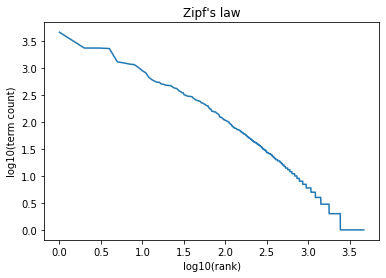

In [ ]:
# your code here
import matplotlib.pyplot as plt
import math

x_init=[math.log10(i) for i in range(1,len(final_doc)+1)]
y_init=[]
for tup in final_doc:
  y_init.append(math.log10(tup[1]))

plt.title("Zipf's law")
plt.xlabel("log10(rank)")
plt.ylabel("log10(term count)")
plt.plot(x_init, y_init)




What do you observe? Explain.

This inverse connection is easier to detect when the log-base10 term counts are plotted on the y-axis and the log-base10 rank is plotted on the x-axis. Given that there might be a significant gap in frequency between the most and least common terms, logarithmic scaling helps to better visualize the link between word frequency and rank. A negative linear relationship between the two variables may be seen in this graphic.

It demonstrates Zipf's law—that a word's frequency declines logarithmically with rank—in practice. It is thought that this pattern, which can be seen in a wide variety of text corpora and languages, represents a basic characteristic of natural language.

# Part 2: Boolean Retrieval (30 points)

In this part you will build an inverted index to support Boolean retrieval. You should use the (1) + (2) tokenization strategy from above (Remove background vocals + Lemmatization). 

We only require your index to support AND queries. In other words, your index does not have to support OR, NOT, or parentheses. Also, we do not explicitly expect to see AND in queries, e.g., when we query **relational model**, your search engine should treat it as **relational** AND **model**.

Search for the queries below using your index and print out matching documents (for each query, print out 5 matching documents):
* time
* never know
* make no sense

Recall, that you should apply the exact same pre-processing strategies to the query as we do to the documents. 

The output should like this:
* DocumentID Document

To make our life easier, please output the DocumentIDs in alphabetical order.

In [ ]:
#create docid lyrics dictionary for future printouts
doc_dict={}
doc_temp=lemmatized_doc

#print(doc_temp)
doc_temp_use=doc_temp.split('\n')
x=0
for lines in doc_temp_use:
  #print(lines)
  x+=1;
  line=lines.split(' ',1)
  #docid=line[0]+'lyric'
  #print(line[0])
  #print(line[1])
  if x<=total_doc_size:
    line[1]=line[1].replace('\\n', '')
    line[1]=line[1].replace('\n', '')
    doc_dict[line[0]]=line[1]

#doc_dict


In [ ]:
# build the index here
# add cells as needed to organize your code
import string
total_doc_split=lemmatized_doc.split('\n')
from collections import defaultdict
inverted_index_table=defaultdict(list)
inv_index_table_sorted=defaultdict(list)
for lines in total_doc_split:
    
    lines=lines.replace('\\n',' ')
    lines=lines.replace('\n',' ')
    lines=lines.replace('\\','')

    
    #lines=lines.replace('-',' ')
    #print (lines)
    index_position=0
    docid=""
    words_list=word_tokenize(lines)
    for word in words_list:
      
      
      if index_position==0:
        index_position+=1;
       # print(word)
        docid=word
      elif index_position>0 and word not in string.punctuation:
        if docid not in inverted_index_table[word]:
          inverted_index_table[word].append(docid)


# print(hash_t)

inverted_index=[]
for key in inverted_index_table:
    inverted_index_table[key].sort()

    inverted_index.append((key,inverted_index_table[key]))

inverted_index.sort()
inv_index_table_sorted=dict(inverted_index)

#inv_index_table_sorted


Now show the results for the query: `time`

In [ ]:
# search for the input using your index and print out ids of matching documents.
print("DocumentID Document")
print("--------------------------------------------------------------------------------")
for i in range(0,5):
  #print(inv_index_table_sorted['time'][i] +" ")
  #print(inv_index_table_sorted['time'][i])
  #print(doc_dict[inv_index_table_sorted['time'][i]])
  print("{} {}".format(inv_index_table_sorted['time'][i], doc_dict[inv_index_table_sorted['time'][i]]))

DocumentID Document
--------------------------------------------------------------------------------
5-seconds-of-summer-close-a-stranger-lyric  six week since i've been awayand now you're saying everything ha changedand i'm afraid that i might be losing youand every night that we spend aloneit kill me thinking of you on your ownand i wish i wa back home next to you oh, everyday you feel a little bit further awayand i don't know what to say are we wating timetalking on a broken line?telling you i haven't seen your face in agei feel like we're a close a strangerwon't give upeven though it hurt so muchevery night i'm losing you in a thouand facenow it feel we're a close a stranger late night call and another textis this a good a we're gonna get?another time zone taking me away from youliving dream and fluorescent lightwhile you and i are running out of timebut you know that i'll alway wait for you oh, everyday you feel a little bit further awayand i don't know what to say are we wating t

Now show the results for the query: `never know`


In [ ]:
# your code here
def find_matching_docids(query_token_list):
  
  k=len(query_token_list)

  #print(k)
  candidate_docid=""
  candidates=[]
  if(k>1):
    #evaluate by pairs of two words --> AND implementation
    for i in range(k-1):
      list_first=[]
      list_second=[]
      if i==0: 
        firstword=query_token_list[i]
        list_first=inv_index_table_sorted[firstword]
      else:
        listfirst=candidates
        candidates.clear()
      secondword=query_token_list[i+1]
      #takes the smaller sized document frequency value first for query optimization
      if(len(list_first)<len(inv_index_table_sorted[secondword])):
        list_first=inv_index_table_sorted[firstword]
        list_second=inv_index_table_sorted[secondword]
      else:
        list_second=inv_index_table_sorted[firstword]
        list_first=inv_index_table_sorted[secondword]
      for candidate_docid in list_first:
          if candidate_docid in list_second:
            candidates.append(candidate_docid)
      
  return candidates
  #candidates


input="never know"
input_phrase_query=input.lower()
query_token_list=word_tokenize(input_phrase_query)
lemmatizer=WordNetLemmatizer()
for i in range(len(query_token_list)):
  query_token_list[i]=lemmatizer.lemmatize(query_token_list[i])

secondquery_matched_docs=[]
secondquery_matched_docs=find_matching_docids(query_token_list)
#secondquery_matched_docs[:5]
print("DocumentID Document")
print("--------------------------------------------------------------------------------")
for i in range(0,5):
  #print(inv_index_table_sorted['time'][i] +" ")
  #print(inv_index_table_sorted['time'][i])
  #print(doc_dict[inv_index_table_sorted['time'][i]])
  print("{} {}".format(secondquery_matched_docs[i], doc_dict[secondquery_matched_docs[i]]))

DocumentID Document
--------------------------------------------------------------------------------
2pac-u-r-ripping-u-apart-dedicated-2-crack-annotated before u came the triangle never brokewe were bonded and melded a onebut a the 2 puhed u awaythe one got weak and embraced uand now u r ripping u apartthe worst feeling of helplenessthe greatest pain ha rested in my heartthe vision of heaven fadeand the nightmare of loneline ha startedmy hero ha been defeated by youand now what can i dowatch a u destroy uand our love is finally throughi know the worst is herei feel it in my heartu got into the circlenow you're tearing u apart !!!!!!!!!!!!!!"
5-seconds-of-summer-heartbreak-girl-lyric  you call me up, it's like a broken recordsaying that your heart hurtthat you'd never get over him getting over youand you end up cryand i end up lying'caue i'm jut a sucker for anything that you do and when then phone call finally endyou say \"thanks for being a friend\"and we're going in circle again and

Now show the results for the query: `make no sense`

In [ ]:
# your code here
input="make no sense"
input_phrase_query=input.lower()
query_token_list=word_tokenize(input_phrase_query)
lemmatizer=WordNetLemmatizer()
for i in range(len(query_token_list)):
  query_token_list[i]=lemmatizer.lemmatize(query_token_list[i])

thirdquery_matched_docs=[]
thirdquery_matched_docs=find_matching_docids(query_token_list)
#thirdquery_matched_docs
print("DocumentID Document")
print("--------------------------------------------------------------------------------")
for i in range(0,5):
  #print(inv_index_table_sorted['time'][i] +" ")
  #print(inv_index_table_sorted['time'][i])
  #print(doc_dict[inv_index_table_sorted['time'][i]])
  print("{} {}".format(thirdquery_matched_docs[i], doc_dict[thirdquery_matched_docs[i]]))

DocumentID Document
--------------------------------------------------------------------------------
bring-me-the-horizon-mother-tongue-lyric  i didn't see it coming  but i never really had much faithin the universe's magic  , oh, notill it pulled u to that time and placeand i'll never forgetwhen the floodgate opened, we, we cried an oceanit still ha me choking; it's hard to explaini know you know me, you don't have to show mei, i feel you're lonely, no need to explain so don't say you love me; fala, \"amo\"jut let your heart speak up, and i'll knowno amount of word could ever find a way to make sense of thisso i wanna hear your mother tongueso don't say you love me; fala, \"amo\"jut let your heart speak up, and i'll knowno amount of word could ever find a way to make sense of thisso i wanna hear your mother tongue and yeah, i could be punchingbut i alway tend to fluctuateand i feel sick that i'm buzzing, oh, love, i'm in troublei'm sorry, but you got me guhing all over the placei neve

## Observations (6 points)
Could your boolean search engine find relevant documents for these queries? What is the impact of the pre-processing options? Do they improve your search quality?

*your discussion here*

*   Boolean search engine does not find relevant documents effectively because it only searches for the presence of a word in any document. It does not take into account the frequency of the word or document frequencies or any other advanced mechanism.
*   The pre processing options helped in better relevancy than without preprocessing. For example the lemmatization helped in finding the same root word in documents and hence, to answer the third question- Yes, the search counts and quality have improved.






# Part 3: Ranking Documents (40 points) 

In this part, your job is to rank the documents rather than just provide set-based results as in Boolean Retrieval.

### A: Ranking with simple sums of TF-IDF scores (10 points) 
For a multi-word query, we rank documents by a simple sum of the TF-IDF scores for the query terms in the document.
TF is the log-weighted term frequency $1+log(tf)$; and IDF is the log-weighted inverse document frequency $log(\frac{N}{df})$

**Output:**
You should output the top-5 results plus the TF-IDF sum score of each of these documents. 

The output should be like this:

Rank Scores DocumentID Document 

In [ ]:
#inverted index table :: term1:[{docid1:freq1}, {docid2:freq2}]

import string
total_doc_split=lemmatized_doc.split('\n')
from collections import defaultdict
inverted_index_table=defaultdict(list)
inv_index_table_sorted=defaultdict(list)
for lines in total_doc_split:
    
    lines=lines.replace('\\n',' ')
    lines=lines.replace('\n',' ')
    lines=lines.replace('\\','')
    
    index_position=0
    docid=""
    words_list=word_tokenize(lines)
    for word in words_list:
      
      
      if index_position==0:
        index_position+=1;
       # print(word)
        docid=word
      elif index_position>0 and word not in string.punctuation:
        #print(word)
        temp_list=[]
        temp_dict={}
        temp_dict_by_word={}

        temp_list=inverted_index_table[word]
        #print(temp_list)
        if len(temp_list)>0:
          for i in temp_list:
          #print(temp_list)
            temp_dict=dict(i)
            temp_dict_by_word.update(temp_dict)
      
        if docid not in temp_dict_by_word:
          inverted_index_table[word].append({docid:1})
        
        else:
            temp_dict_by_word[docid]=temp_dict_by_word[docid]+1
            
            inverted_index_table[word].clear()

            inverted_index_table[word].append(temp_dict_by_word)
             
          



from collections import OrderedDict

final_index_list={}

sorted_postings={}
for key in inverted_index_table:
    
    for entry in inverted_index_table[key]:
      
      sorted_entry = sorted(entry.items(), key=lambda x:x[1])
      sorted_postings=dict(sorted_entry)
    final_index_list[key]=sorted_postings
      
whole_index_list={}
whole_index_list = OrderedDict(sorted(final_index_list.items()))

#for terms, term_info in whole_index_list.items():
#    print("\nTERM: ", terms)
#    
#    for docid in term_info:
#        print(str(docid) + ':', str(term_info[docid]))
#


In [ ]:
# your code here
# hint: you could first call boolean retrieval function in part 2 to find possible relevant documents, 
# and then rank these documents in this part. Hence, you don't need to rank all documents.

#Rank Scores DocumentID Document
def tf_idf_document(query_token_list):
  tf_idf_tokenwise={}
  for token in query_token_list:
    for term, term_info in whole_index_list.items():
      #print (term)
      if term==token:
        #print(term)
        #print(term_info)

        idf=math.log10(total_doc_size/len(term_info))
        tf_idf=0
        tf_idf_score={}
        for docid in term_info:
          tf_idf=0
          term_freq=term_info[docid]
          tf=1+math.log10(term_freq)
          tf_idf=tf*idf
          tf_idf_score[docid]=tf_idf
        
        tf_idf_tokenwise[token]=tf_idf_score
  return tf_idf_tokenwise

          #print(term_freq)
        #term_freq=1


In [ ]:
import string
def calculate_query_dict(query_list):
  term_tf_score_tokenwise={}
  for i in range (len(query_list)):
    tf_token=1
    for j in range(i+1, len(query_list)):
      if query_list[i]==query_list[j]:
        tf_token+=1
    if query_list[i] not in term_tf_score_tokenwise:    
      term_tf_score_tokenwise[query_list[i]]=tf_token

  tf_idf_query_score={}  
  for token in query_list:
    for term, term_info in whole_index_list.items():
      #print (term)
      if term==token:
        #print(term)
        #print(term_info)

        idf=math.log10(total_doc_size/len(term_info))
        tf=1+math.log10(term_tf_score_tokenwise[token])
        tf_idf=tf*idf
        tf_idf_query_score[term]=tf_idf
       
    
  return (tf_idf_query_score)





In [ ]:

def calculate_matching_docs_with_tf_idf_value_combined(tf_idf_combined, query):

  if len(tf_idf_combined)>1:
    final_combined_dict={} 
    combined_dict={}
    for token in tf_idf_combined:
     # print(tf_idf_combined[token])
      first_dict={}

      first_dict=tf_idf_combined[token]
      #print(first_dict)
      if len(combined_dict)==0:
        combined_dict=first_dict
      else:
        second_dict={}
        for match_t in combined_dict:
          if match_t in first_dict:
            second_dict[match_t]=combined_dict[match_t]+first_dict[match_t]
        
        combined_dict=second_dict
    
    combined_dict=sorted(combined_dict.items(), key=lambda x: x[1], reverse=True)
    final_combined_dict[query]=combined_dict
   # print(final_combined_dict)
    return final_combined_dict
      #take two and combine, then proceed with combined result and third and so on
      #if i==0:
        #first_dict=tf_idf_combined[i]
      #second_dict=tf_idf_combined[i+1]



Now show the results for the query: `time`

In [ ]:
# your code here
input="time"


input_phrase_query=input.lower()
query_token_list=word_tokenize(input_phrase_query)
lemmatizer=WordNetLemmatizer()
for i in range(len(query_token_list)):
  query_token_list[i]=lemmatizer.lemmatize(query_token_list[i])

tf_idf_docwise_q1={}
tf_idf_docwise_q1=tf_idf_document(query_token_list)
#tf_idf_docwise_q1


In [ ]:
#query tf idf
tf_idf_querywise_q1={}
tf_idf_querywise_q1=calculate_query_dict(query_token_list)

#tf_idf_querywise_q1

In [ ]:
#tf_idf query and document combination

dict_with_all_doc={}
tf_idf_combined_q1={}
dict_multiplied={}
for key_query in tf_idf_querywise_q1:
  if key_query in tf_idf_docwise_q1:
    dict_multiplied={}
    dict_with_all_doc=tf_idf_docwise_q1[key_query]
    #print(dict_with_all_doc)
    for docid in dict_with_all_doc:
      #print(docid)
      dict_multiplied[docid]=dict_with_all_doc[docid]*tf_idf_querywise_q1[key_query]
    
    tf_idf_combined_q1[key_query]=dict_multiplied

#tf_idf_combined_q1

In [ ]:
tf_idf_combined_whole_query_q1={}
if len(query_token_list)>1:
  tf_idf_combined_whole_query_q1=calculate_matching_docs_with_tf_idf_value_combined(tf_idf_combined_q1, "time")
#print(tf_idf_combined_whole_query_q2)
  import itertools
  out = dict(itertools.islice(tf_idf_combined_whole_query_q1.items(), 10))
  out["time"][:11]
else:
  for token in tf_idf_combined_q1:
    #print(tf_idf_combined_q1[token])
    tf_idf_combined_whole_query_q1=sorted(tf_idf_docwise_q1[token].items(), key=lambda x: x[1], reverse=True)
   # print(tf_idf_combined_whole_query_q1[:5])
    print("Rank Scores DocumentID Document")
    print("--------------------------------------------------------------------------------")
    for i in range(0,5):
      print("{} {:.4f} {} {}".format(i+1, tf_idf_combined_whole_query_q1[:5][i][1],tf_idf_combined_whole_query_q1[:5][i][0], doc_dict[tf_idf_combined_whole_query_q1[:5][i][0]]))


Rank Scores DocumentID Document
--------------------------------------------------------------------------------
1 0.9978 derek-minor-until-the-end-of-time-lyric  time is the fourth dimensionand a meaure in which event can orderedfrom the pat, through the present, into the futureall signify that we are all bound to time i be on that work like i'm 'posed to bei be on this here until you bury mebuildin' his empire that never diei bet he'll be here till the end of timethat's forever, ever ever, ever everever, ever ever, till the end of timethat's forever, ever ever, ever everever, ever ever, till the end of timethat's forever, ever ever, ever everever, ever ever, till the end of timethat's forever, ever ever, ever everever, ever ever, till the end of time grindin', workin', hutlin' on this mission, i will never quitevery single track you put in front of me i'm killin' itnot for money, fame, attention, this is what i'm gettin atchrist the king and this his empire, he don't deserve no le th

Now show the results for the query: `never know`

In [ ]:
# your code here
input="never know"
input_phrase_query=input.lower()
query_token_list=word_tokenize(input_phrase_query)
lemmatizer=WordNetLemmatizer()
for i in range(len(query_token_list)):
  query_token_list[i]=lemmatizer.lemmatize(query_token_list[i])

#calculate document tf-idf
tf_idf_docwise_q2={}
tf_idf_docwise_q2=tf_idf_document(query_token_list)
#tf_idf_docwise_q2





In [ ]:

#calculate query tf-idf
tf_idf_querywise_q2={}
tf_idf_querywise_q2=calculate_query_dict(query_token_list)
#tf_idf_querywise_q2



In [ ]:
#tf_idf query and document combination

dict_with_all_doc={}
tf_idf_combined_q2={}
dict_multiplied={}
for key_query in tf_idf_querywise_q2:
  if key_query in tf_idf_docwise_q2:
    dict_multiplied={}
    dict_with_all_doc=tf_idf_docwise_q2[key_query]
    #print(dict_with_all_doc)
    for docid in dict_with_all_doc:
      #print(docid)
      dict_multiplied[docid]=dict_with_all_doc[docid]*tf_idf_querywise_q2[key_query]
    
    tf_idf_combined_q2[key_query]=dict_multiplied

#tf_idf_combined_q2



In [ ]:
tf_idf_combined_whole_query_q2={}
tf_idf_combined_whole_query_q2=calculate_matching_docs_with_tf_idf_value_combined(tf_idf_docwise_q2, "never know")
#print(tf_idf_combined_whole_query_q2)
import itertools
out = dict(itertools.islice(tf_idf_combined_whole_query_q2.items(), 10))
#out["never know"][:5]
print("Rank Scores DocumentID Document")
print("--------------------------------------------------------------------------------")
for i in range(0,5):
      print("{} {:.4f} {} {}".format(i+1, out["never know"][:5][i][1],out["never know"][:5][i][0], doc_dict[out["never know"][:5][i][0]]))


Rank Scores DocumentID Document
--------------------------------------------------------------------------------
1 1.2951 skrillex-pretty-bye-bye-lyric  i know you are troublebut i can't seem to get awayall the pleaure, all the painpalm tree swaying in the rainall those time we stayed inthe way the smoke would fill the roomand we'd be dancing in the cloudlike we had nothing to lose i haven't heard from you, it's been a long timeknow that i hurt you, it stay on my mindlet me make it rightwe never said goodbyewhat you been thinking 'bout?know that we're worth the fightso let me make it righti might have had my doubtsaid some thing i regretif i could take it backi wouldn't hesitatewe never said goodbyenever said goodbye, babywhat you been thinking 'boutyou've been thinking 'bout lately?know we're worth the fightknow we're worth the fightso let me make it rightit's been a long time so letso letso letso letso letso letso letso let me make it right i know you are troublebut i can't seem to g

Now show the results for the query: `make no sense`

In [ ]:
# your code here
input="make no sense"

input_phrase_query=input.lower()
query_token_list=word_tokenize(input_phrase_query)
lemmatizer=WordNetLemmatizer()
for i in range(len(query_token_list)):
  query_token_list[i]=lemmatizer.lemmatize(query_token_list[i])

tf_idf_docwise_q3={}
tf_idf_docwise_q3=tf_idf_document(query_token_list)
#tf_idf_docwise_q3

In [ ]:
tf_idf_querywise_q3={}
tf_idf_querywise_q3=calculate_query_dict(query_token_list)
#tf_idf_querywise_q3

In [ ]:
#tf_idf query and document combination

dict_with_all_doc={}
tf_idf_combined_q3={}
dict_multiplied={}
for key_query in tf_idf_querywise_q3:
  if key_query in tf_idf_docwise_q3:
    dict_multiplied={}
    dict_with_all_doc=tf_idf_docwise_q3[key_query]
    #print(dict_with_all_doc)
    for docid in dict_with_all_doc:
      #print(docid)
      dict_multiplied[docid]=dict_with_all_doc[docid]*tf_idf_querywise_q3[key_query]
    
    tf_idf_combined_q3[key_query]=dict_multiplied

#tf_idf_combined_q3

In [ ]:


tf_idf_combined_whole_query_q3={}

tf_idf_combined_whole_query_q3=calculate_matching_docs_with_tf_idf_value_combined(tf_idf_docwise_q3, "make no sense")

import itertools
out = dict(itertools.islice(tf_idf_combined_whole_query_q3.items(), 10))
#out["make no sense"][:5]
print("Rank Scores DocumentID Document")
print("--------------------------------------------------------------------------------")
for i in range(0,5):
      print("{} {:.4f} {} {}".format(i+1, out["make no sense"][:5][i][1],out["make no sense"][:5][i][0], doc_dict[out["make no sense"][:5][i][0]]))


Rank Scores DocumentID Document
--------------------------------------------------------------------------------
1 4.4822 bring-me-the-horizon-mother-tongue-lyric  i didn't see it coming  but i never really had much faithin the universe's magic  , oh, notill it pulled u to that time and placeand i'll never forgetwhen the floodgate opened, we, we cried an oceanit still ha me choking; it's hard to explaini know you know me, you don't have to show mei, i feel you're lonely, no need to explain so don't say you love me; fala, \"amo\"jut let your heart speak up, and i'll knowno amount of word could ever find a way to make sense of thisso i wanna hear your mother tongueso don't say you love me; fala, \"amo\"jut let your heart speak up, and i'll knowno amount of word could ever find a way to make sense of thisso i wanna hear your mother tongue and yeah, i could be punchingbut i alway tend to fluctuateand i feel sick that i'm buzzing, oh, love, i'm in troublei'm sorry, but you got me guhing all

### B: Ranking with vector space model with TF-IDF (10 points) 

**Cosine:** You should use cosine as your scoring function. 

**TFIDF:** For the document vectors, use the standard TF-IDF scores as introduced in A. For the query vector, use simple weights (the raw term frequency). For example:
* query: never $\rightarrow$ (1)
* query: never know $\rightarrow$ (1, 1)

**Output:**
You should output the top-5 results plus the cosine score of each of these documents.  

The output should be like this:

Rank Scores DocumentID Document 

---

You can additionally assume that your queries will contain at most three words. Be sure to normalize your vectors as part of the cosine calculation!

In [ ]:
#cosine functions

import string

def calculate_doc_length(total_doc):
    doc_len_dict={}
    total_words=0
    total_doc_size=0
    total_doc_split2=total_doc.split('\n')
    for lines in total_doc_split2:
     # total_doc_size+=1
      lines=lines.replace('\\n',' ')
      lines=lines.replace('\n',' ')

      words_list=word_tokenize(lines)

      index_position=0
      docu_id=""
      for word in words_list:
        
        if index_position==0:
            docu_id=word
          #print(words_list[index_position])
            index_position+=1
            #print("tokenfound")
            total_words=len(words_list)
            total_doc_size=total_words-1
        doc_len_dict[docu_id]=total_doc_size
    return doc_len_dict
      #return total_doc_size

def calculate_query_dict_normalized(query_list, doc_len_dict):
  

  term_tf_score_tokenwise={}
  for i in range (len(query_list)):
    tf_token=1
    for j in range(i+1, len(query_list)):
      if query_list[i]==query_list[j]:
        tf_token+=1
    if query_list[i] not in term_tf_score_tokenwise:    
      term_tf_score_tokenwise[query_list[i]]=tf_token

  #print(term_tf_score_tokenwise)
  tf_idf_query_score={}
  doc_len=0  
  for token in query_list:
    for term, term_info in whole_index_list.items():
      #print (term)
      if term==token:
        #print(term)
        #print(term_info)
        for docid in term_info:
          #print(docid)
          if docid in doc_len_dict:
            doc_len= doc_len_dict[docid] 
            tf=term_tf_score_tokenwise[token]
            #print(tf)
        #tf_idf=tf*idf
        tf_idf_query_score[term]=tf
       
  #print(tf_idf_query_score) 
  return (tf_idf_query_score)



def tf_idf_document_termwise(dictionary_total):
    hash_total={}
  
    total_doc_split2=dictionary_total.split('\n')
    for lines in total_doc_split2:
     # total_doc_size+=1

      lines=lines.replace('\\n',' ')
      lines=lines.replace('\n',' ')
      '''
      lines=lines.replace(',',' ')
      '''

      words_list=word_tokenize(lines)
      #print(words_list)
      #print(words_list)
      #words_list=re.split(r'\s|,|;', lines)

     # print(word)
      hash_t={}
      index_position=0
      for word in words_list:
        if index_position==0:
          docu_id=word
          index_position+=1;
        elif index_position>0:
          
            lemmatizer=WordNetLemmatizer()
            word=lemmatizer.lemmatize(word)
            if word in hash_t:
              hash_t[word]=hash_t[word]+1
            else:
              hash_t[word]=1
        #print(hash_t)
      hash_total[docu_id]=hash_t

    #print()
    return hash_total

def calculate_tf_idf_in_document(document):
  hash_total={}
  tf=0
  idf=0
  tf_idf=0
  for token in document:
    #print(token)
    #print(document[token])
    hash_t={}
    for word in document[token]:
      #print (document[token][word])
      
      for term, term_info in whole_index_list.items():
        #print (term)
        if word==term:
          #print(term)
          #print(term_info)

          idf=math.log10(total_doc_size/len(term_info))
          tf=1+math.log10(document[token][word]) 
          tf_idf=tf*idf
          hash_t[term]=tf_idf
      #print(hash_t)
    hash_total[token]=hash_t
      #print(token)
 
  return hash_total


def euclidean_dist(diction):
  sum=0
  for word in diction:
    sum+=diction[word]*diction[word]
  #print(math.sqrt(sum))
  return math.sqrt(sum)

def calculate_cosine(tf_idf_doc, tf_idf_querywise):
  cosine_dict={}
  for doc in tf_idf_doc:
      #print(tf_idf_doc[doc])
    dot_prod=0
    denominator=-1
    for word in tf_idf_doc[doc]:  
      #print(word)  
      for query_token in tf_idf_querywise:
      #print(query_token)      
        if word== query_token:
          dot_prod+=tf_idf_querywise[query_token]*tf_idf_doc[doc][word]
    denominator=euclidean_dist(tf_idf_doc[doc])* euclidean_dist(tf_idf_querywise)
    if  denominator!=0:
     # print("denominator=0")
     # print(doc)
     # print(tf_idf_doc[doc])
     # denominator=-1
      cosine_dict[doc]=dot_prod/denominator
  return cosine_dict


Now show the results for the query: `time`

In [ ]:
# your code here

input="time"

input_phrase_query=input.lower()
query_token_list=word_tokenize(input_phrase_query)
lemmatizer=WordNetLemmatizer()
for i in range(len(query_token_list)):
  query_token_list[i]=lemmatizer.lemmatize(query_token_list[i])
  
doc_len_dict=calculate_doc_length(lemmatized_doc)

#calculate query tf-idf
tf_idf_querywise_q1={}
tf_idf_querywise_q1=calculate_query_dict_normalized(query_token_list, doc_len_dict)
#print(tf_idf_querywise_q1)
tf_idf_docwise_q1={}
#tf_idf_docwise_q2=tf_idf_document_normalized(query_token_list, doc_len_dict)
tf_idf_docwise_q1_only_tf=tf_idf_document_termwise(lemmatized_doc)
tf_idf_doc_q1=calculate_tf_idf_in_document(tf_idf_docwise_q1_only_tf)

cosine_q1={}
cosine_q1_sorted={}
cosine_q1=calculate_cosine(tf_idf_doc_q1, tf_idf_querywise_q1)
cosine_q1_sorted=sorted(cosine_q1.items(), key=lambda x: x[1], reverse=True)
#print(cosine_q1_sorted[:5])
print("Rank Scores DocumentID Document")
print("--------------------------------------------------------------------------------")
for i in range(0,5):
      print("{} {:.4f} {} {}".format(i+1, cosine_q1_sorted[:5][i][1],cosine_q1_sorted[:5][i][0], doc_dict[cosine_q1_sorted[:5][i][0]]))



Rank Scores DocumentID Document
--------------------------------------------------------------------------------
1 0.0654 the-beatles-carry-that-weight-lyric  boy, you're gonna carry that weightcarry that weight a long timeboy, you're gonna carry that weightcarry that weight a long time  i never give you my pillowi only send you my invitationand in the middle of the celebrationi break down boy, you're gonna carry that weightcarry that weight a long timeboy, you're gonna carry that weightcarry that weight a long time "
2 0.0570 john-legend-for-the-first-time-lyric   is that muic in my earit's like i heard nothing for a thouand yearmy eye were closed, locking in my teari wa so surrounded but still all alonea great big houe but so far from homehow'd you breathe life in this heart of soul it's like i can feel, it's like i can breatheit's like i can live, it's like i can lovefor the first time, for the first timefor the first time, for the first time i'm electric, finally exposedyou see thr

Now show the results for the query: `never know`

In [ ]:



# your code here
input="never know"

input_phrase_query=input.lower()
query_token_list=word_tokenize(input_phrase_query)
lemmatizer=WordNetLemmatizer()
for i in range(len(query_token_list)):
  query_token_list[i]=lemmatizer.lemmatize(query_token_list[i])

doc_len_dict=calculate_doc_length(lemmatized_doc)

#calculate query tf-idf
tf_idf_querywise_q2={}
tf_idf_querywise_q2=calculate_query_dict_normalized(query_token_list, doc_len_dict)
#print(tf_idf_querywise_q2)

#calculate document tf/euclidean dist for each doc i.e. length normalized

tf_idf_docwise_q2={}
#tf_idf_docwise_q2=tf_idf_document_normalized(query_token_list, doc_len_dict)
tf_idf_docwise_q2_only_tf=tf_idf_document_termwise(lemmatized_doc)
tf_idf_doc_q2=calculate_tf_idf_in_document(tf_idf_docwise_q2_only_tf)






In [ ]:



cosine_q2={}
cosine_q2_sorted={}
cosine_q2=calculate_cosine(tf_idf_doc_q2, tf_idf_querywise_q2)
cosine_q2_sorted=sorted(cosine_q2.items(), key=lambda x: x[1], reverse=True)
#print(cosine_q2_sorted[:5])
print("Rank Scores DocumentID Document")
print("--------------------------------------------------------------------------------")
for i in range(0,5):
      print("{} {:.4f} {} {}".format(i+1, cosine_q2_sorted[:5][i][1],cosine_q2_sorted[:5][i][0], doc_dict[cosine_q2_sorted[:5][i][0]]))




Rank Scores DocumentID Document
--------------------------------------------------------------------------------
1 0.0460 billie-eilish-8-lyric  wait a minute, let me finishi know you don't carebut can you listen?i came committed, guess i overdid itwore my heart out on a chainaround my neck, but now it's missin', hmm da-da-da-da-da-da  da-da-da-da-da-da-da  oh, hmm, hmm so i think i better goi never really know how to pleae youyou're lookin' at me like i'm see-throughi guess i'm gonna goi jut never know how you feeldo you even feel anything? da-da-da-da-da-dada-da-da-da-da-da-daoh, hmm, hmm you said, \"don't treat me badly\"but you said it so sadlyso i did the best i couldnot thinkin' you would have left me gladlyi know you're not sorrywhy should you be?'caue who am i to be in lovewhen your love never is for me?me da-da-da-da-da-da  da-da-da-da-da-da-da  oh, hmm, hmm so i think i better goi never really know how to pleae youyou're lookin' at me like i'm see-throughi guess i'm gonna goi

Now show the results for the query: `make no sense`

In [ ]:
# your code here

input="make no sense"

input_phrase_query=input.lower()
query_token_list=word_tokenize(input_phrase_query)
lemmatizer=WordNetLemmatizer()
for i in range(len(query_token_list)):
  query_token_list[i]=lemmatizer.lemmatize(query_token_list[i])
  
doc_len_dict=calculate_doc_length(lemmatized_doc)

#calculate query tf-idf
tf_idf_querywise_q3={}
tf_idf_querywise_q3=calculate_query_dict_normalized(query_token_list, doc_len_dict)
#print(tf_idf_querywise_q3)
tf_idf_docwise_q3={}
#tf_idf_docwise_q2=tf_idf_document_normalized(query_token_list, doc_len_dict)
tf_idf_docwise_q3_only_tf=tf_idf_document_termwise(lemmatized_doc)
tf_idf_doc_q3=calculate_tf_idf_in_document(tf_idf_docwise_q3_only_tf)

cosine_q3={}
cosine_q3_sorted={}
cosine_q3=calculate_cosine(tf_idf_doc_q3, tf_idf_querywise_q3)
cosine_q3_sorted=sorted(cosine_q3.items(), key=lambda x: x[1], reverse=True)
#print(cosine_q3_sorted[:5])
print("Rank Scores DocumentID Document")
print("--------------------------------------------------------------------------------")
for i in range(0,5):
      print("{} {:.4f} {} {}".format(i+1, cosine_q3_sorted[:5][i][1],cosine_q3_sorted[:5][i][0], doc_dict[cosine_q3_sorted[:5][i][0]]))



Rank Scores DocumentID Document
--------------------------------------------------------------------------------
1 0.1202 bring-me-the-horizon-mother-tongue-lyric  i didn't see it coming  but i never really had much faithin the universe's magic  , oh, notill it pulled u to that time and placeand i'll never forgetwhen the floodgate opened, we, we cried an oceanit still ha me choking; it's hard to explaini know you know me, you don't have to show mei, i feel you're lonely, no need to explain so don't say you love me; fala, \"amo\"jut let your heart speak up, and i'll knowno amount of word could ever find a way to make sense of thisso i wanna hear your mother tongueso don't say you love me; fala, \"amo\"jut let your heart speak up, and i'll knowno amount of word could ever find a way to make sense of thisso i wanna hear your mother tongue and yeah, i could be punchingbut i alway tend to fluctuateand i feel sick that i'm buzzing, oh, love, i'm in troublei'm sorry, but you got me guhing all

### C: Ranking with BM25 (10 points) 
Finally, let's try the BM25 approach for ranking. Refer to https://en.wikipedia.org/wiki/Okapi_BM25 for the specific formula. You could choose k_1 = 1.2 and b = 0.75 but feel free to try other options.

**Output:**
You should output the top-5 results plus the BM25 score of each of these documents.  

The output should be like this:

Rank Scores DocumentID Document

In [ ]:
#bm25 calculations

def calculate_bm25(tf_idf_doc, query_token_list, doc_len_dict):
  #calculate idf dict
  idf_query={}
  N= total_doc_size

  query_idf={}
  for query_word in query_token_list:
    idf=0
    postings_length=0
    for term, term_info in whole_index_list.items():
          #print (term)
          if query_word==term:
            #print(term)
            #print(term_info)

            postings_length=len(term_info)
            idf=math.log(((N-postings_length+0.5)/(postings_length+0.5))+1)
            query_idf[query_word]=idf
  #print(query_idf)

  #calculate bm25 score 
  k_1 = 1.2
  b = 0.75

  #calculate avgdl
  avgdl=0
  for docid in doc_len_dict:
    avgdl+=doc_len_dict[docid]
  avgdl=avgdl/len(doc_len_dict)
  #print(avgdl)


  query_based_bm25_for_each_doc={}
  bm25_for_each_doc={}
  for query_word in query_token_list:
    for doc in tf_idf_doc:
       for word in tf_idf_doc[doc]:
         if word==query_word:  
            f_qD=tf_idf_doc[doc][word]
            #print(doc)
            #print(word)
            #print(f_qD)
            for docid in doc_len_dict:
              if doc==docid:
                D=doc_len_dict[docid]
                #print(docid)
                #print(D)
                bm25_for_each_doc[doc]=query_idf[query_word]*((f_qD*(k_1+1))/(f_qD+k_1*(1-b+(b*(D/avgdl)))))
    query_based_bm25_for_each_doc[query_word]=bm25_for_each_doc
  #print(query_based_bm25_for_each_doc)

  #combining all words in query
  #bm25={}
  doc_sum={}
  for query_word in query_based_bm25_for_each_doc:
    if len(doc_sum)==0:
      doc_sum=query_based_bm25_for_each_doc[query_word]
    else:
      for word in query_based_bm25_for_each_doc[query_word]:
        doc_sum[word]+=query_based_bm25_for_each_doc[query_word][word]
  return doc_sum




Now show the results for the query: `time`

In [ ]:
# your code here
input="time"

input_phrase_query=input.lower()
query_token_list=word_tokenize(input_phrase_query)
lemmatizer=WordNetLemmatizer()
for i in range(len(query_token_list)):
  query_token_list[i]=lemmatizer.lemmatize(query_token_list[i])
  
doc_len_dict=calculate_doc_length(lemmatized_doc)


bm25_q1={}
bm25_q1_sorted={}
bm25_q1=calculate_bm25(tf_idf_docwise_q1_only_tf, query_token_list, doc_len_dict)
bm25_q1_sorted=sorted(bm25_q1.items(), key=lambda x: x[1], reverse=True)
#print(bm25_q1_sorted[:5])
print("Rank Scores DocumentID Document")
print("--------------------------------------------------------------------------------")
for i in range(0,5):
      print("{} {:.4f} {} {}".format(i+1, bm25_q1_sorted[:5][i][1],bm25_q1_sorted[:5][i][0], doc_dict[bm25_q1_sorted[:5][i][0]]))



Rank Scores DocumentID Document
--------------------------------------------------------------------------------
1 2.0234 john-legend-for-the-first-time-lyric   is that muic in my earit's like i heard nothing for a thouand yearmy eye were closed, locking in my teari wa so surrounded but still all alonea great big houe but so far from homehow'd you breathe life in this heart of soul it's like i can feel, it's like i can breatheit's like i can live, it's like i can lovefor the first time, for the first timefor the first time, for the first time i'm electric, finally exposedyou see through me, strip off all my clothesif this is falling, then let me go, oh it's like i can feel, it's like i can breatheit's like i can live, it's like i can lovefor the first time, for the first timefor the first time, for the first time i'm finally awake and i can feel my heartit's beating like a drum when i'm right here where you arei can feel it, i can feel it, ohcan you feel it it's like i can feel, it's l

Now show the results for the query: `never know`

In [ ]:
# your code here
input="never know"

input_phrase_query=input.lower()
query_token_list=word_tokenize(input_phrase_query)
lemmatizer=WordNetLemmatizer()
for i in range(len(query_token_list)):
  query_token_list[i]=lemmatizer.lemmatize(query_token_list[i])
  
doc_len_dict=calculate_doc_length(lemmatized_doc)


bm25_q2={}
bm25_q2_sorted={}
bm25_q2=calculate_bm25(tf_idf_docwise_q1_only_tf, query_token_list, doc_len_dict)
bm25_q2_sorted=sorted(bm25_q2.items(), key=lambda x: x[1], reverse=True)
#print(bm25_q2_sorted[:5])
print("Rank Scores DocumentID Document")
print("--------------------------------------------------------------------------------")
for i in range(0,5):
      print("{} {:.4f} {} {}".format(i+1, bm25_q2_sorted[:5][i][1],bm25_q2_sorted[:5][i][0], doc_dict[bm25_q2_sorted[:5][i][0]]))


Rank Scores DocumentID Document
--------------------------------------------------------------------------------
1 3.5785 camila-cabello-never-be-the-same-remix-lyric  something mut've gone wrong in my braingot your chemical all in my veinfeeling all the high, feeling all the painlet go on the wheel, it\u2019s the bullet lanenow i'm seeing red, not thinking straightblurring all the line, you intoxicate me jut like nicotine, heroin, morphinesuddenly, i'm a fiend and you're all i needall i need, yeah, you're all i need it's you, babeand i'm a sucker for the way that you move, babeand i could try to run, but it would be ueleyou're to blamejut one hit of you, i knew i'll never be the sameit's you, babeand i'm a sucker for the way that you move, babeand i could try to run, but it would be ueleyou're to blamejut one hit of you, i knew i'll never ever, ever be the same i'll never be the samei'll never be the samei'll never be the samenever be the same sneaking in l.a. when the light are lowof

Now show the results for the query: `make no sense`

In [ ]:
# your code here

input="make no sense"

input_phrase_query=input.lower()
query_token_list=word_tokenize(input_phrase_query)
lemmatizer=WordNetLemmatizer()
for i in range(len(query_token_list)):
  query_token_list[i]=lemmatizer.lemmatize(query_token_list[i])
  
doc_len_dict=calculate_doc_length(lemmatized_doc)


bm25_q3={}
bm25_q3_sorted={}
bm25_q3=calculate_bm25(tf_idf_docwise_q1_only_tf, query_token_list, doc_len_dict)
bm25_q3_sorted=sorted(bm25_q3.items(), key=lambda x: x[1], reverse=True)
#print(bm25_q3_sorted[:5])
print("Rank Scores DocumentID Document")
print("--------------------------------------------------------------------------------")
for i in range(0,5):
      print("{} {:.4f} {} {}".format(i+1, bm25_q3_sorted[:5][i][1],bm25_q3_sorted[:5][i][0], doc_dict[bm25_q3_sorted[:5][i][0]]))

Rank Scores DocumentID Document
--------------------------------------------------------------------------------
1 24.1544 bring-me-the-horizon-mother-tongue-lyric  i didn't see it coming  but i never really had much faithin the universe's magic  , oh, notill it pulled u to that time and placeand i'll never forgetwhen the floodgate opened, we, we cried an oceanit still ha me choking; it's hard to explaini know you know me, you don't have to show mei, i feel you're lonely, no need to explain so don't say you love me; fala, \"amo\"jut let your heart speak up, and i'll knowno amount of word could ever find a way to make sense of thisso i wanna hear your mother tongueso don't say you love me; fala, \"amo\"jut let your heart speak up, and i'll knowno amount of word could ever find a way to make sense of thisso i wanna hear your mother tongue and yeah, i could be punchingbut i alway tend to fluctuateand i feel sick that i'm buzzing, oh, love, i'm in troublei'm sorry, but you got me guhing al

### Discussion (10 points)
Briefly discuss the differences you see between the three methods. You should try additional queries beyond the ones we list. Is there a ranking approach you prefer? Explain and give concrete examples.


In [ ]:
# your code here
input="build me up"

input_phrase_query=input.lower()
query_token_list=word_tokenize(input_phrase_query)
lemmatizer=WordNetLemmatizer()
for i in range(len(query_token_list)):
  query_token_list[i]=lemmatizer.lemmatize(query_token_list[i])

tf_idf_docwise_q4={}
tf_idf_docwise_q4=tf_idf_document(query_token_list)
tf_idf_querywise_q4={}
tf_idf_querywise_q4=calculate_query_dict(query_token_list)
#tf_idf query and document combination

dict_with_all_doc={}
tf_idf_combined_q4={}
dict_multiplied={}
for key_query in tf_idf_querywise_q4:
  if key_query in tf_idf_docwise_q4:
    dict_multiplied={}
    dict_with_all_doc=tf_idf_docwise_q4[key_query]
    #print(dict_with_all_doc)
    for docid in dict_with_all_doc:
      #print(docid)
      dict_multiplied[docid]=dict_with_all_doc[docid]*tf_idf_querywise_q4[key_query]
    
    tf_idf_combined_q4[key_query]=dict_multiplied

#tf_idf_combined_q3


tf_idf_combined_whole_query_q4={}

tf_idf_combined_whole_query_q4=calculate_matching_docs_with_tf_idf_value_combined(tf_idf_docwise_q4, "build me up")

import itertools
out = dict(itertools.islice(tf_idf_combined_whole_query_q4.items(), 10))
#out["make no sense"][:5]
print()
print("Rank Scores DocumentID Document-- Tf-IDF Without Length Normalized")
print("--------------------------------------------------------------------------------") #since minimum of 
for i in range(0,3):
      print("{} {:.4f} {} {}".format(i+1, out["build me up"][:5][i][1],out["build me up"][:5][i][0], doc_dict[out["build me up"][:5][i][0]]))




input="build me up"

input_phrase_query=input.lower()
query_token_list=word_tokenize(input_phrase_query)
lemmatizer=WordNetLemmatizer()
for i in range(len(query_token_list)):
  query_token_list[i]=lemmatizer.lemmatize(query_token_list[i])

doc_len_dict=calculate_doc_length(lemmatized_doc)

#calculate query tf-idf
tf_idf_querywise_q4={}
tf_idf_querywise_q4=calculate_query_dict_normalized(query_token_list, doc_len_dict)
#print(tf_idf_querywise_q3)
tf_idf_docwise_q4={}
#tf_idf_docwise_q2=tf_idf_document_normalized(query_token_list, doc_len_dict)
tf_idf_docwise_q4_only_tf=tf_idf_document_termwise(lemmatized_doc)
tf_idf_doc_q4=calculate_tf_idf_in_document(tf_idf_docwise_q4_only_tf)

cosine_q4={}
cosine_q4_sorted={}
cosine_q4=calculate_cosine(tf_idf_doc_q4, tf_idf_querywise_q3)
cosine_q4_sorted=sorted(cosine_q4.items(), key=lambda x: x[1], reverse=True)
#print(cosine_q3_sorted[:5])
print()
print("Rank Scores DocumentID Document-- Cosine")
print("--------------------------------------------------------------------------------")
for i in range(0,5):
      print("{} {:.4f} {} {}".format(i+1, cosine_q4_sorted[:5][i][1],cosine_q4_sorted[:5][i][0], doc_dict[cosine_q4_sorted[:5][i][0]]))

input="build me up"

input_phrase_query=input.lower()
query_token_list=word_tokenize(input_phrase_query)
lemmatizer=WordNetLemmatizer()
for i in range(len(query_token_list)):
  query_token_list[i]=lemmatizer.lemmatize(query_token_list[i])

doc_len_dict=calculate_doc_length(new_doc)


bm25_q4={}
bm25_q4_sorted={}
bm25_q4=calculate_bm25(tf_idf_docwise_q1_only_tf, query_token_list, doc_len_dict)
bm25_q4_sorted=sorted(bm25_q4.items(), key=lambda x: x[1], reverse=True)
#print(bm25_q3_sorted[:5])
print()
print("Rank Scores DocumentID Document-- BM25")
print("--------------------------------------------------------------------------------")
for i in range(0,5):
      print("{} {:.4f} {} {}".format(i+1, bm25_q4_sorted[:5][i][1],bm25_q4_sorted[:5][i][0], doc_dict[bm25_q4_sorted[:5][i][0]]))


Rank Scores DocumentID Document-- Tf-IDF Without Length Normalized
--------------------------------------------------------------------------------
1 3.2848 imagine-dragon-believer-lyric  first thing firsti'ma say all the word inside my headi'm fired up and tired of the way that thing have been, oh-oohthe way that thing have been, oh-oohsecond thing seconddon't you tell me what you think that i could bei'm the one at the sail, i'm the mater of my sea, oh-oohthe mater of my sea, oh-ooh i wa broken from a young agetaking my sulkin' to the maeswriting my poem for the fewthat look at me, took to me, shook at me, feelin' mesinging from heartache from the paintaking my message from the veinspeaking my leon from the brainseeing the beauty through the... pain! you made me a, you made me a believer, believerpain! you break me down and build me up, believer, believerpain! oh, let the bullet fly, oh, let them rainmy life, my love, my drive, it came from...pain! you made me a, you made me a belie

*your discussion here*

**Explanation:**
In the above example run we see that the cosine scoring and BM25 functions give similar result. However the first tf-idf based scores are completely different. The first scores are not reliable much since it is not length normalized i.e. the length of the document affects the scores and ranks.

Coming to the next two methods, TF-IDF using cosine method i.e. length normalized and BM25 are more reliable. BM25 is even more reliable since tf-idf suffers from the fact that it saturates for term frequency and document frequency. BM25 overcomes this shortcoming.

However, both BM25 and TF-IDF suffer from a shortcoming that they cannot effectively detect proximity related queries. 

# Part 4: Cool Extension (10 points) 

Finally, we give you an opportunity to explore some more sophisticated approach to your search engine. This is your chance to show off something you find interesting. For example, you might:


*   Add a positional index so you can support phrase queries
*   Implement a permuterm index for wildcard queries
*   Incorporate spell correction
*   Index all of the lyrics at https://www.cs.cornell.edu/~arb/data/genius-expertise/ and demonstrate an efficient implementation
*   Try a more advanced ranking approach
*   ...

We will grade this last part according to effort, creativity, and impact.



#idea: Add a positional index so you can support phrase queries

In order to support phrase queries, here is my approach:

a. Create an inverted index table with word-> docids-> positions for the word in each document
b. Find the word and its common document where the positions of each consecutive words in the query are at consecutive positions in the same document
c. Proof correctness of the algorithm by 3 use cases:
  i. simple two word query
  ii. multi word query
  iii. queries needing lemmatization (since the lyrics document is lemmatized, we need same preprocessing)


In [ ]:
#idea: Add a positional index so you can support phrase queries

#inverted index table :: term1:[{docid1:freq1}, {docid2:freq2}]

import string
total_doc_split=lemmatized_doc.split('\n')
from collections import defaultdict
inverted_index_table=defaultdict(list)
inv_index_table_sorted=defaultdict(list)
for lines in total_doc_split:
    
    lines=lines.replace('\\n',' ')
    lines=lines.replace('\n',' ')
    lines=lines.replace('\\','')
    
    index_position=-1
    docid=""
    words_list=word_tokenize(lines)
    
    for word in words_list:
      
      index_position+=1;
      if index_position==0:
        
       # print(word)
        docid=word
      elif index_position>0 and word not in string.punctuation:
        #print(word)
        temp_list=[]
        temp_dict={}
        temp_dict_by_word={}

        temp_list=inverted_index_table[word]
        #print(temp_list)
        if len(temp_list)>0:
          for i in temp_list:
          #print(temp_list)
            temp_dict=dict(i)
            temp_dict_by_word.update(temp_dict)
      
        if docid not in temp_dict_by_word:
          inverted_index_table[word].append({docid:{index_position}})
         # print(inverted_index_table[word])
        
        else:
           # print(temp_dict_by_word[docid])
            temp_dict_by_word[docid].add(index_position)
            
            inverted_index_table[word].clear()

            inverted_index_table[word].append(temp_dict_by_word)

#print(inverted_index_table)          
          



from collections import OrderedDict

final_index_list={}

sorted_postings={}
for key in inverted_index_table:
    
    for entry in inverted_index_table[key]:
      #print(str(key)+"->"+str(entry))
      for docs in entry:
       # print(entry[docs])
        sorted_entry = sorted(entry[docs])
        sorted_postings[docs]=sorted_entry
    final_index_list[key]=sorted_postings
      
whole_index_list={}
whole_index_list = OrderedDict(sorted(final_index_list.items()))

for terms, term_info in whole_index_list.items():
    print("\nTERM: ", terms)
    
    for docid in term_info:
        print(str(docid) + ':', str(term_info[docid]))





Streaming output truncated to the last 5000 lines.
linkin-park-from-the-inside-lyric: [121]
eric-b-and-rakim-paid-in-full-lyric: [452]
wordplayed-martinellis-lyric: [572]
radiohead-jigsaw-falling-into-place-lyric: [215, 219]
lecrae-killa-lyric: [446]
rihanna-umbrella-lyric: [561, 564, 572, 575, 588, 591, 599, 602]
alicia-keys-empire-state-of-mind-part-ii-broken-down-lyric: [290]
sublime-doin-time-lyric: [361]
metallica-and-jutice-for-all-lyric: [221]
miley-cyru-if-we-were-a-movie-lyric: [207]
charli-xcx-stay-away-lyric: [302]
2pac-u-r-ripping-u-apart-dedicated-2-crack-annotated: [105]
marian-hill-differently-lyric: [320]
flo-rida-elevator-lyric: [574]
lana-del-rey-elvis-lyric: [221]
funkadelic-aint-that-funkin-kinda-hard-on-you-louie-vega-remix-lyric: [431]
erykah-badu-in-love-with-you-lyric: [317]
rick-ross-hello-remix-lyric: [433, 436, 439]
kris-kross-amsterdam-and-conor-maynard-are-you-sure-lyric: [249]
yona-light-remix-lyric: [432]
skrillex-pretty-bye-bye-lyric: [45, 237]
radiohead

In [ ]:
#phrase queries

def phrase_queries_calculation(query_token_list, input_phrase_query):
  common_dict={}
  for query in query_token_list:
    for terms, term_info in whole_index_list.items():
        #print("\nTERM: ", terms)
        if query==terms:
          for docid in term_info:
              #print(str(docid) + ':', str(term_info[docid]))
              if(query==query_token_list[0]):
                common_dict[docid]=term_info[docid]
              else:
                if docid in common_dict:
                  new_list=[]
                  for pos1 in common_dict[docid]:
                    for pos2 in term_info[docid]:
                      if pos1+1==pos2:
                        new_list.append(pos1)
                        common_dict[docid].clear()
                        common_dict[docid]=new_list

  print(input_phrase_query+": ")
  for docid in common_dict:
    if len(common_dict[docid])>0:
      print(docid+" FOUND AT POSITION "+str(common_dict[docid]))

#can handle simple two word phrase
input_phrase_query="my world"
input_phrase_query=input_phrase_query.lower()
query_token_list=word_tokenize(input_phrase_query)
lemmatizer=WordNetLemmatizer()
for i in range(len(query_token_list)):
  query_token_list[i]=lemmatizer.lemmatize(query_token_list[i])

phrase_queries_calculation(query_token_list, input_phrase_query)



my world: 
erykah-badu-kiss-me-on-my-neck-lyric FOUND AT POSITION [381]
daniel-caesar-we-find-love-lyric FOUND AT POSITION [246]
florence-the-machine-hunger-lyric FOUND AT POSITION [418]
michael-jackson-will-you-be-there-lyric FOUND AT POSITION [190]
partynextdoor-not-nice-lyric FOUND AT POSITION [450]
mue-time-is-running-out-lyric FOUND AT POSITION [204]
gorillaz-new-geniu-brother-lyric FOUND AT POSITION [100]
dj-khaled-i-love-you-so-much-lyric FOUND AT POSITION [674, 695, 716, 726, 737, 758]
flo-rida-wild-one-lyric FOUND AT POSITION [466, 471]
major-lazer-cold-water-lyric FOUND AT POSITION [259]
bryan-greenberg-you-can-run-lyric FOUND AT POSITION [419]
gorillaz-latin-simone-lyric FOUND AT POSITION [115]
5-seconds-of-summer-heartbreak-girl-lyric FOUND AT POSITION [286]
arctic-monkeys-too-much-to-ak-lyric FOUND AT POSITION [225]
destinys-child-independent-woman-part-1-lyric FOUND AT POSITION [548]
lupe-fiaco-airplane-lyric FOUND AT POSITION [495]
sia-breathe-me-lyric FOUND AT POSITION 

In [ ]:
#can handle multi word phrase
input_phrase_query="a wild one"
input_phrase_query=input_phrase_query.lower()
query_token_list=word_tokenize(input_phrase_query)
lemmatizer=WordNetLemmatizer()
for i in range(len(query_token_list)):
  query_token_list[i]=lemmatizer.lemmatize(query_token_list[i])

phrase_queries_calculation(query_token_list, input_phrase_query)



a wild one: 
erykah-badu-kiss-me-on-my-neck-lyric FOUND AT POSITION [381]
daniel-caesar-we-find-love-lyric FOUND AT POSITION [246]
florence-the-machine-hunger-lyric FOUND AT POSITION [418]
michael-jackson-will-you-be-there-lyric FOUND AT POSITION [190]
partynextdoor-not-nice-lyric FOUND AT POSITION [450]
mue-time-is-running-out-lyric FOUND AT POSITION [204]
gorillaz-new-geniu-brother-lyric FOUND AT POSITION [100]
dj-khaled-i-love-you-so-much-lyric FOUND AT POSITION [674, 695, 716, 726, 737, 758]
flo-rida-wild-one-lyric FOUND AT POSITION [466, 471]
major-lazer-cold-water-lyric FOUND AT POSITION [259]
bryan-greenberg-you-can-run-lyric FOUND AT POSITION [419]
gorillaz-latin-simone-lyric FOUND AT POSITION [115]
5-seconds-of-summer-heartbreak-girl-lyric FOUND AT POSITION [286]
arctic-monkeys-too-much-to-ak-lyric FOUND AT POSITION [225]
destinys-child-independent-woman-part-1-lyric FOUND AT POSITION [548]
lupe-fiaco-airplane-lyric FOUND AT POSITION [495]
sia-breathe-me-lyric FOUND AT POSITIO

In [ ]:
#can handle a phrase which needs lemmatization eg. "gets high" -> "get high" after lemmatization
input_phrase_query="gets high"
input_phrase_query=input_phrase_query.lower()
query_token_list=word_tokenize(input_phrase_query)
lemmatizer=WordNetLemmatizer()
for i in range(len(query_token_list)):
  query_token_list[i]=lemmatizer.lemmatize(query_token_list[i])

phrase_queries_calculation(query_token_list, input_phrase_query)

gets high: 
erykah-badu-kiss-me-on-my-neck-lyric FOUND AT POSITION [381]
daniel-caesar-we-find-love-lyric FOUND AT POSITION [246]
florence-the-machine-hunger-lyric FOUND AT POSITION [418]
michael-jackson-will-you-be-there-lyric FOUND AT POSITION [190]
partynextdoor-not-nice-lyric FOUND AT POSITION [450]
mue-time-is-running-out-lyric FOUND AT POSITION [204]
gorillaz-new-geniu-brother-lyric FOUND AT POSITION [100]
dj-khaled-i-love-you-so-much-lyric FOUND AT POSITION [674, 695, 716, 726, 737, 758]
flo-rida-wild-one-lyric FOUND AT POSITION [466, 471]
major-lazer-cold-water-lyric FOUND AT POSITION [259]
bryan-greenberg-you-can-run-lyric FOUND AT POSITION [419]
gorillaz-latin-simone-lyric FOUND AT POSITION [115]
5-seconds-of-summer-heartbreak-girl-lyric FOUND AT POSITION [286]
arctic-monkeys-too-much-to-ak-lyric FOUND AT POSITION [225]
destinys-child-independent-woman-part-1-lyric FOUND AT POSITION [548]
lupe-fiaco-airplane-lyric FOUND AT POSITION [495]
sia-breathe-me-lyric FOUND AT POSITION